# **To Classify dog breeds using Transfer Learning and Tensorflow**
In this model have harnessed the power of TensorFlow Hub to create a sophisticated dog breed prediction system. Here's a brief overview of what our code accomplishes:

Data Preparation: We have meticulously prepared the dataset, ensuring it's clean and properly formatted for training and testing. This includes data loading, preprocessing, and data splitting to create the training and validation sets.

Feature Extraction with TensorFlow Hub: The core of our code revolves around leveraging TensorFlow Hub to access pre-trained deep learning models, specifically designed for image classification tasks. We employ these models to extract high-level features from the dog images. This step significantly reduces the complexity of our model and enhances prediction accuracy.

Transfer Learning: With the extracted features as inputs, we employ transfer learning techniques to build a custom classifier. This classifier is fine-tuned to predict dog breeds accurately. Transfer learning allows us to take advantage of the knowledge learned by the pre-trained model on a large dataset and adapt it to our specific task.

Training and Evaluation: We meticulously train our model using the training dataset and validate it using the validation dataset. We employ performance metrics such as accuracy, precision, recall, and F1-score to assess the model's predictive capabilities.

Inference: After training, our model is ready to make predictions. Given an input image of a dog, it can accurately predict the breed based on the features learned during training.

Kaggle Submission: If you're participating in the Kaggle competition, our code facilitates the creation of submission files with predicted dog breed labels for the test dataset. This allows you to easily submit your predictions to Kaggle and evaluate your model's performance on the competition's leaderboard.

Documentation: To ensure ease of use, we have provided comprehensive documentation within our code. It explains each step, the purpose of various functions, and how to modify hyperparameters for further experimentation.

In summary, our code streamlines the process of dog breed prediction using TensorFlow Hub, incorporating state-of-the-art deep learning techniques. Whether you're a machine learning enthusiast or a Kaggle competitor, our code simplifies the task and ensures accurate results.

Kaggle Competition link: https://www.kaggle.com/c/dog-breed-identification/data

This project done in the period of course Data Science Bootcamp (Zero To Mastery)

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
import tensorflow_hub as hub
import os
from google.colab import drive
from IPython.display import display, Image
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread

In [2]:
# Load a CSV file containing dog breed labels into a DataFrame
label_data = pd.read_csv("/content/drive/MyDrive/Data/labels.csv")
print(label_data.describe())
print(label_data.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


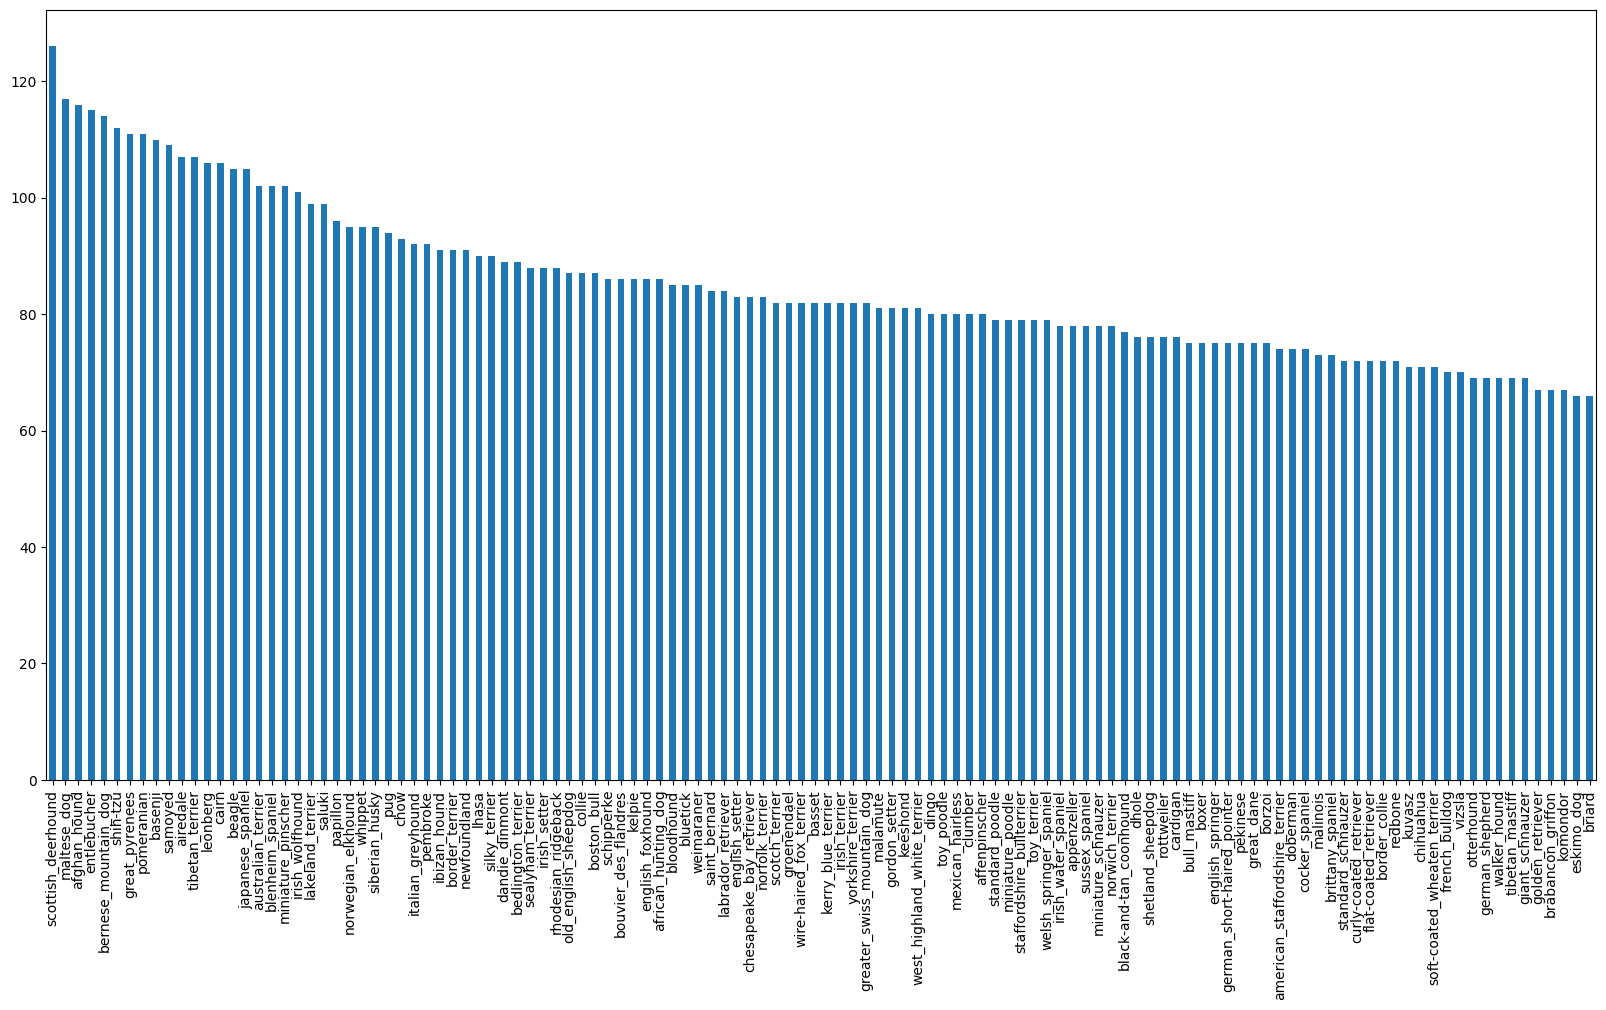

In [3]:
# Create a bar plot to visualize the distribution of dog breeds in the dataset
label_data["breed"].value_counts().plot.bar(figsize = (20,10));

In [4]:
# Generate a list of file paths for the training images based on the 'id' column in the DataFrame
filenames = ["/content/drive/MyDrive/Data/train/" + fname + ".jpg" for fname in label_data["id"]]
print(filenames[:10])
print(len(filenames))

['/content/drive/MyDrive/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg', '/content/drive/MyDrive/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg', '/content/drive/MyDrive/Data/train/001cdf01b096e06d78e9e5112d419397.jpg', '/content/drive/MyDrive/Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg', '/content/drive/MyDrive/Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg', '/content/drive/MyDrive/Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg', '/content/drive/MyDrive/Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg', '/content/drive/MyDrive/Data/train/002a283a315af96eaea0e28e7163b21b.jpg', '/content/drive/MyDrive/Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg', '/content/drive/MyDrive/Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']
10222


In [6]:
# Check if the number of files in the specified training directory matches the number of generated file paths
if len(os.listdir("/content/drive/MyDrive/Data/train/")) == len(filenames):
  print("Matches")
else:
  print("Do not Match")

Matches


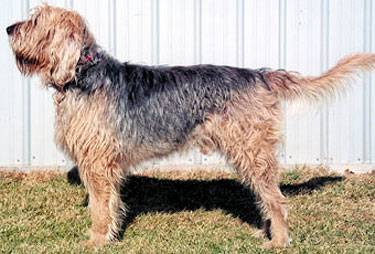

In [7]:
# Display an image using the file path at index 500 in the 'filenames' list
Image(filenames[500])

In [8]:
# Extract the labels (dog breeds) from the 'breed' column of the DataFrame and convert them to a NumPy array
labels = label_data["breed"].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [9]:
# Check if the number of labels matches the number of filenames in the dataset
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [10]:
# Find unique dog breed labels in the dataset using NumPy's unique function
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [11]:
# Display the label of the first image in the dataset
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
# Create boolean labels for each image, indicating whether it belongs to a specific dog breed
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [13]:
# Display the original label of the first image
print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0])
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [14]:
X = filenames  #Assign the file paths (filenames) to variable 'X'
y = boolean_labels # Assign the boolean labels to variable 'y'

In [15]:
# Define the variable 'NUM_IMAGES' and set its initial value to 1000
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [16]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [17]:
image = imread(filenames[50]) #Read in an image from the specified file path

image.shape

(240, 320, 3)

In [18]:
tf.constant(image)[:2] #Convert the loaded image to a TensorFlow constant and output the first two elements

<tf.Tensor: shape=(2, 320, 3), dtype=uint8, numpy=
array([[[176, 163, 146],
        [157, 144, 127],
        [148, 135, 118],
        ...,
        [109,  94,  97],
        [ 76,  60,  70],
        [ 75,  59,  70]],

       [[168, 155, 138],
        [148, 135, 118],
        [150, 137, 120],
        ...,
        [100,  86,  86],
        [ 64,  49,  56],
        [ 86,  70,  80]]], dtype=uint8)>

In [19]:
IMG_SIZE = 224
# Define a function to process an image given its file path
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [20]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [21]:
BATCH_SIZE = 32
#Define a function to create data batches for training, validation, or testing
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)  #Turn the data into batches
  return data_batch

In [22]:
# Create data batches for training and validation datasets
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [23]:
# Check the element specifications of the training and validation data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [24]:
# Define a function to display 25 images from a data batch
def show_25_images(images, labels):
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

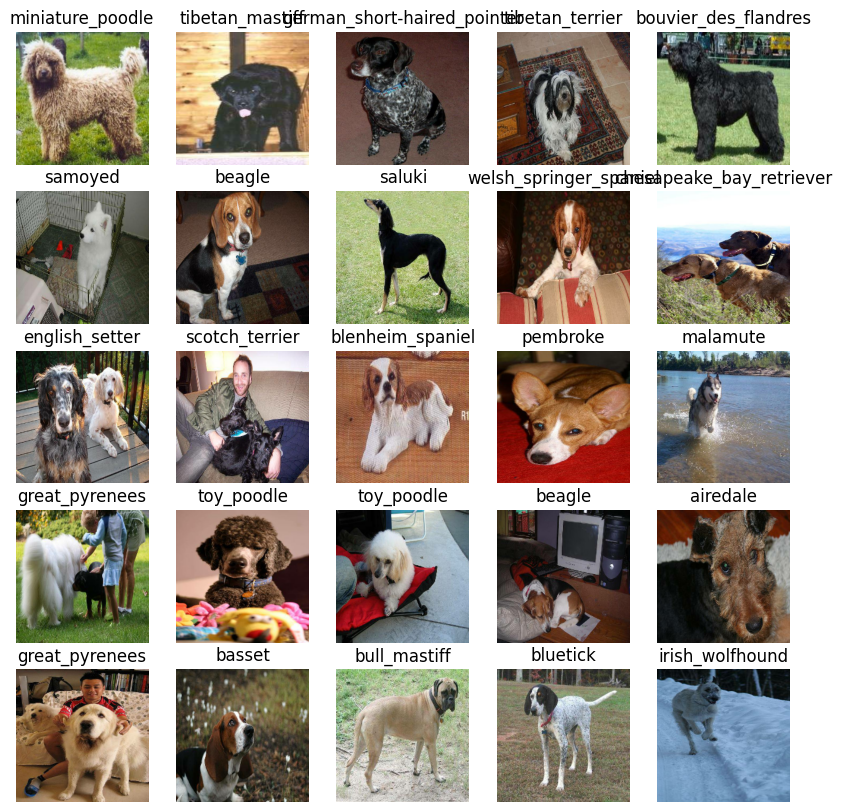

In [25]:
# Get the next batch of training data from the training data iterator
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

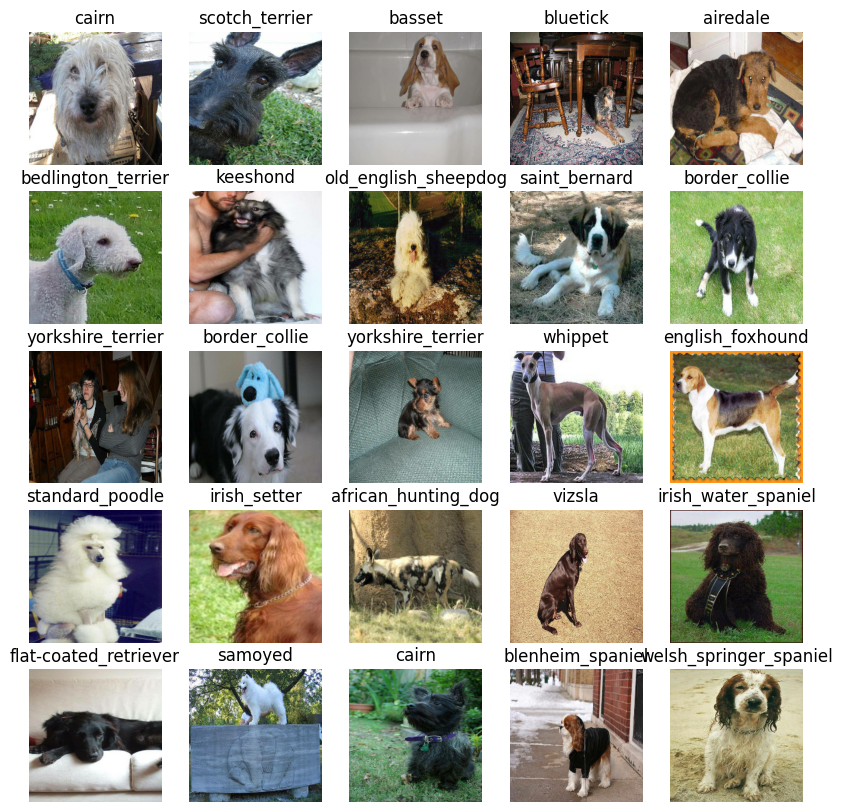

In [26]:
# Get the next batch of validation data from the validation data iterator
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [27]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4" # Define the URL for the pre-trained model on TensorFlow Hub

In [28]:
# Define a function to create a Keras model for transfer learning
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax")
  ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(INPUT_SHAPE)
  return model

In [31]:
# Create a Keras model for dog breed classification and display its summary
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [32]:
%load_ext tensorboard

In [33]:
# Define a function to create a TensorBoard callback for logging model training
def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/Data/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [34]:
# Define an EarlyStopping callback for monitoring validation accuracy
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [35]:
# Define the number of training epochs with a slider in the range of 10 to 100 in steps of 10
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [36]:
# Define a function to train a given model and return the trained version
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [37]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 106s 4s/step - loss: 4.6837 - accuracy: 0.1088 - val_loss: 3.3871 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 3s 117ms/step - loss: 1.6952 - accuracy: 0.6625 - val_loss: 2.0555 - val_accuracy: 0.5550
Epoch 3/100
25/25 [==============================] - 3s 105ms/step - loss: 0.5852 - accuracy: 0.9287 - val_loss: 1.5552 - val_accuracy: 0.6400
Epoch 4/100
25/25 [==============================] - 3s 104ms/step - loss: 0.2607 - accuracy: 0.9937 - val_loss: 1.3449 - val_accuracy: 0.6550
Epoch 5/100
25/25 [==============================] - 3s 109ms/step - loss: 0.1479 - accuracy: 0.9962 - val_loss: 1.2814 - val_accuracy: 0.6700
Epoch 6/100
25/25 [==============================] - 4s 139ms/step - loss: 0.1023 - accuracy: 0.9987 - val_loss: 1.2391 - val_accuracy: 0.6750
Epoch 7/100
25/25 [==============================]

In [38]:
%tensorboard --logdir drive/MyDrive/Data/logs

<IPython.core.display.Javascript object>

In [39]:
# Make predictions using the trained model on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 77ms/step


array([[1.48441095e-03, 3.00412270e-04, 1.81788433e-04, ...,
        7.08382868e-04, 2.47787975e-05, 4.48474055e-03],
       [3.71226016e-03, 7.62807555e-04, 1.17685376e-02, ...,
        1.80766301e-03, 9.85375047e-03, 3.94530653e-04],
       [1.14639524e-05, 9.74995564e-05, 9.70200472e-06, ...,
        5.16731416e-05, 1.94167114e-06, 1.16151976e-04],
       ...,
       [2.25055937e-05, 2.17561304e-04, 5.38897584e-05, ...,
        2.14038973e-05, 1.82789190e-05, 4.37583221e-05],
       [9.26647219e-04, 2.47702614e-04, 4.14822825e-05, ...,
        1.33498674e-04, 6.33672826e-05, 1.11242114e-02],
       [5.21627589e-05, 5.18837915e-05, 3.31604038e-03, ...,
        1.65716186e-02, 5.18732762e-04, 3.90944151e-05]], dtype=float32)

In [40]:
predictions.shape

(200, 120)

In [41]:
# Explore the model's predictions for a single example from the validation data
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[0])}")
print(f"Max index: {np.argmax(predictions[0])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}")

[1.48441095e-03 3.00412270e-04 1.81788433e-04 1.71061474e-04
 6.77704520e-05 2.13376217e-04 7.27337524e-02 1.07384787e-03
 2.42037160e-04 1.16687885e-03 3.31767253e-04 1.62044569e-04
 9.63336381e-04 1.97237750e-05 3.06789210e-04 4.86099598e-04
 2.51027504e-05 1.95765749e-01 1.12787515e-04 1.85632089e-04
 6.10122865e-04 4.54754154e-05 9.80293989e-05 1.10901962e-03
 1.23535574e-04 1.58919499e-03 1.22230262e-01 6.99412602e-04
 2.73539685e-03 3.25270405e-04 8.15379462e-05 5.45529707e-04
 1.70000631e-03 5.46135052e-05 3.47776768e-05 2.25630216e-02
 2.10919570e-05 4.05306375e-04 7.63495511e-04 1.48694075e-04
 1.58374000e-03 5.33901657e-05 7.53830245e-05 1.77208844e-04
 3.29113973e-05 4.06159779e-05 2.21260852e-04 7.97599903e-04
 1.63054516e-04 1.07415882e-03 8.46164185e-05 2.60835979e-04
 1.02247170e-03 4.20283148e-04 4.79814393e-04 3.98727279e-05
 4.09303939e-05 7.38294004e-03 1.00925499e-04 2.92692669e-02
 3.09231516e-04 1.68125538e-04 3.14952747e-04 1.27119842e-04
 7.06213934e-04 3.098340

In [42]:
# Define a function to get a predicted label based on an array of prediction probabilities
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [43]:
# Define a function to get a predicted label based on an array of prediction probabilities
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [44]:
# Define a function to unbatchify a batched dataset of (image, label) Tensors
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [45]:
# Define a function to visualize predictions, true labels, and images for a sample
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

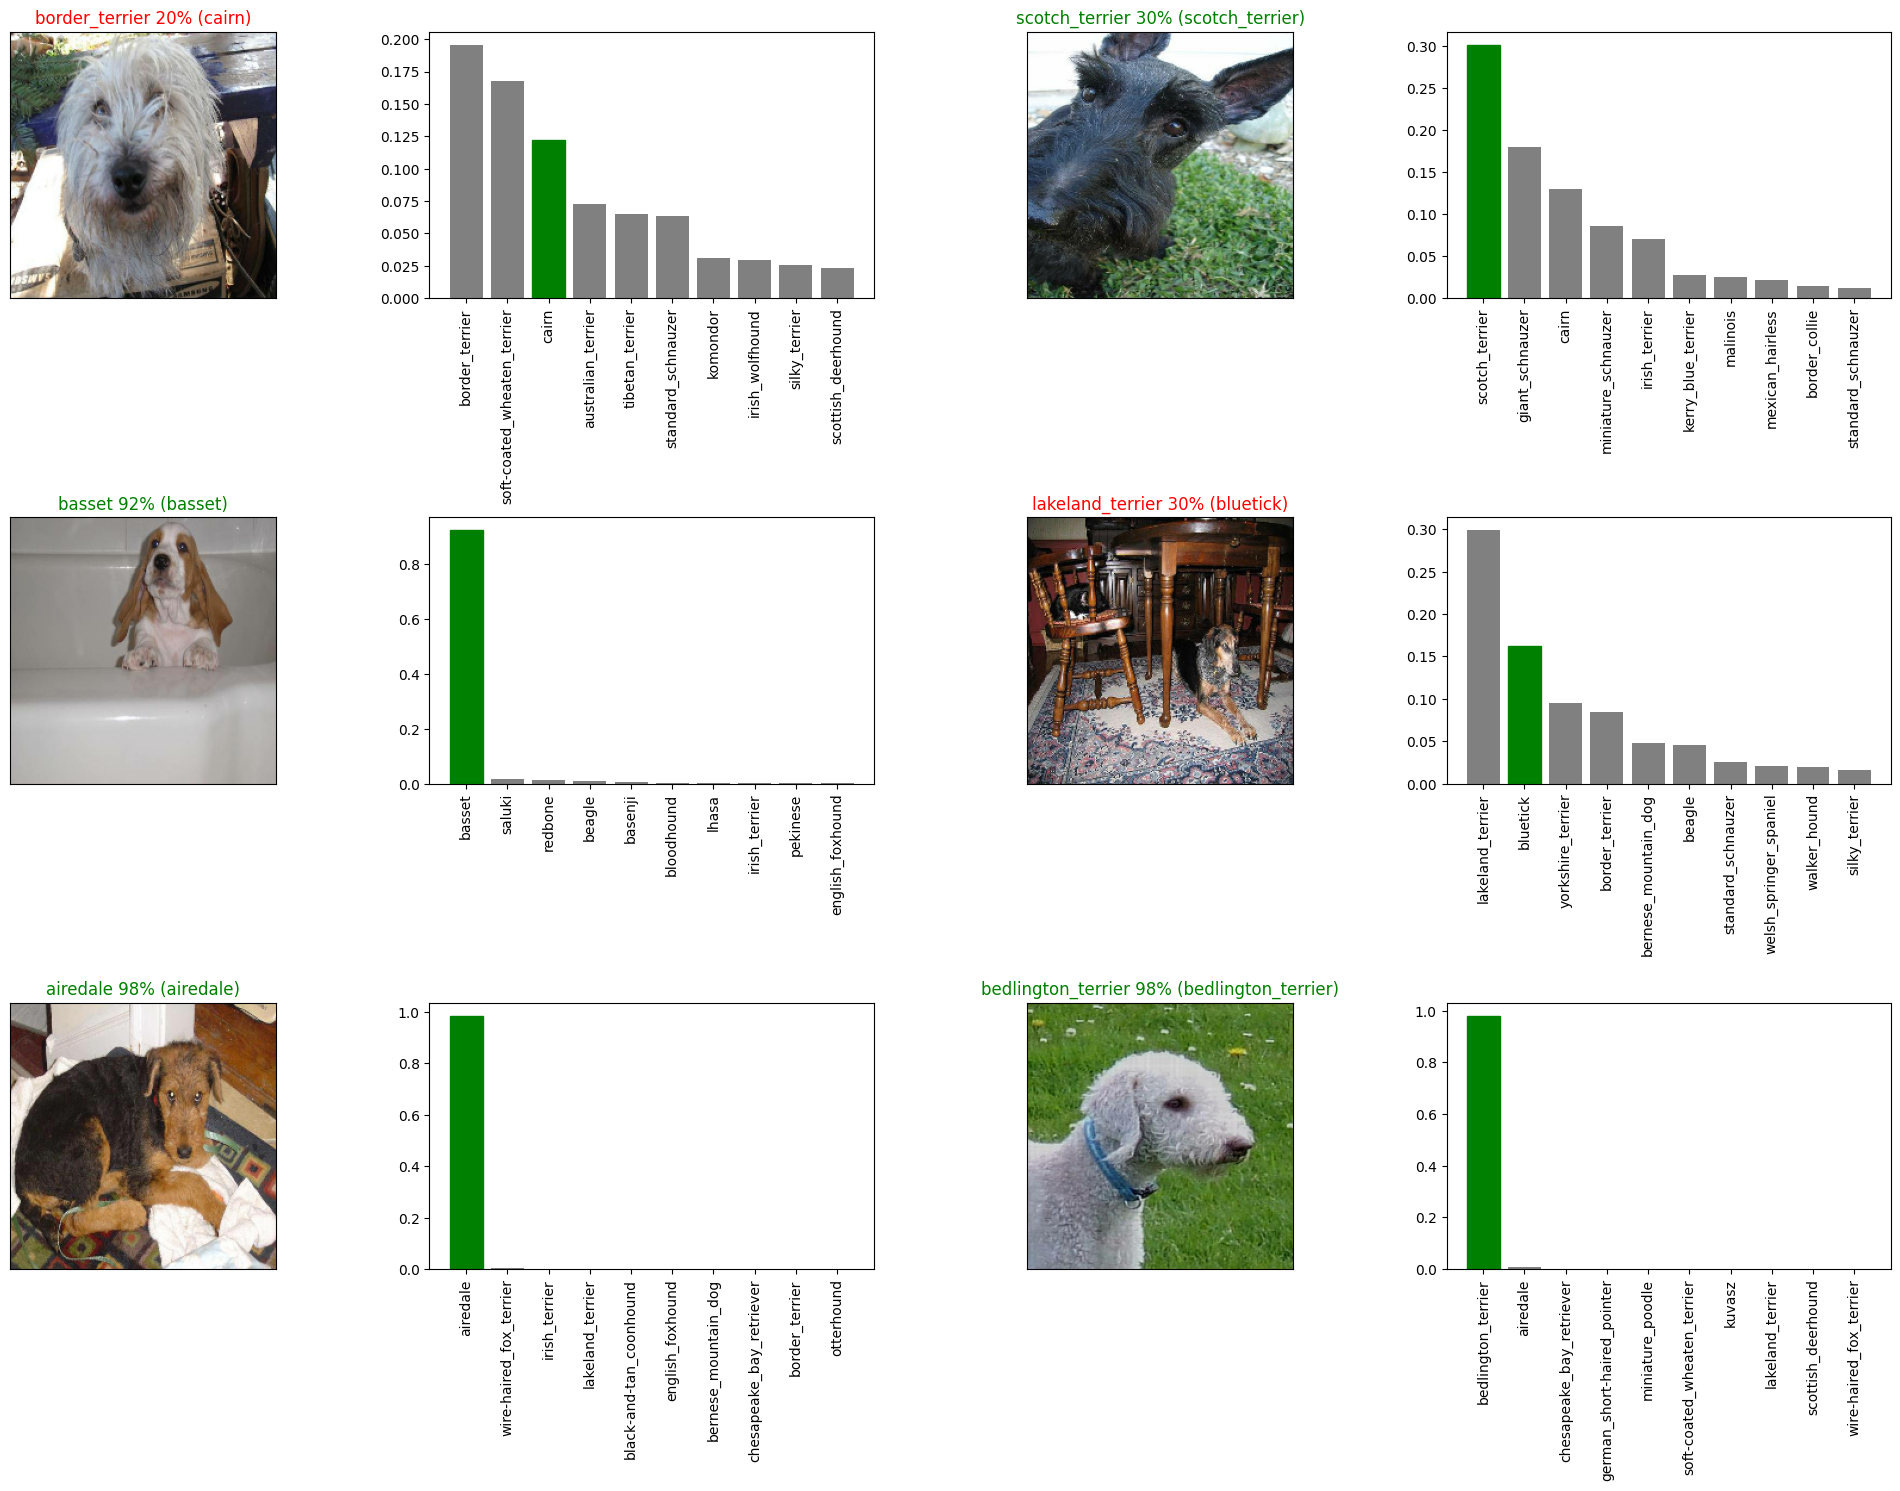

In [46]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [47]:
#Saving the file so we can use test the model in test dataset
def save_model(model, suffix=None):
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [48]:
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [49]:
save_model(model, suffix="1000-images-Eldi")

Saving model to: drive/My Drive/Data/models/20230927-12281695817706-1000-images-Eldi.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Data/models/20230927-12281695817706-1000-images-Eldi.h5'

In [51]:
model_1000_images = load_model('drive/MyDrive/Data/models/20230927-12281695817706-1000-images-Eldi.h5')

Loading saved model from: drive/MyDrive/Data/models/20230927-12281695817706-1000-images-Eldi.h5


In [52]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 84ms/step - loss: 1.1420 - accuracy: 0.6950


[1.1419955492019653, 0.6949999928474426]

In [53]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 2s 113ms/step - loss: 1.1420 - accuracy: 0.6950


[1.1419955492019653, 0.6949999928474426]

In [54]:
full_data = create_data_batches(X, y) #Fill full data in data batch

Creating training data batches...


In [55]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [56]:
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [57]:
%tensorboard --logdir drive/MyDrive/Data/logs

Reusing TensorBoard on port 6006 (pid 3768), started 0:02:12 ago. (Use '!kill 3768' to kill it.)

<IPython.core.display.Javascript object>

In [58]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 913s 3s/step - loss: 1.3232 - accuracy: 0.6765
Epoch 2/100
320/320 [==============================] - 30s 94ms/step - loss: 0.3997 - accuracy: 0.8843
Epoch 3/100
320/320 [==============================] - 29s 91ms/step - loss: 0.2363 - accuracy: 0.9372
Epoch 4/100
320/320 [==============================] - 29s 92ms/step - loss: 0.1554 - accuracy: 0.9626
Epoch 5/100
320/320 [==============================] - 29s 92ms/step - loss: 0.1066 - accuracy: 0.9798
Epoch 6/100
320/320 [==============================] - 30s 92ms/step - loss: 0.0763 - accuracy: 0.9871
Epoch 7/100
320/320 [==============================] - 30s 92ms/step - loss: 0.0584 - accuracy: 0.9907
Epoch 8/100
320/320 [==============================] - 29s 91ms/step - loss: 0.0479 - accuracy: 0.9929
Epoch 9/100
320/320 [==============================] - 29s 91ms/step - loss: 0.0375 - accuracy: 0.9960
Epoch 10/100
320/320 [==============================] - 30s 92ms/step - lo

In [59]:
# Save model to file
save_model(full_model, suffix="all-images-Eldi")

Saving model to: drive/My Drive/Data/models/20230927-12541695819272-all-images-Eldi.h5...


'drive/My Drive/Data/models/20230927-12541695819272-all-images-Eldi.h5'

In [60]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Data/models/20230927-12541695819272-all-images-Eldi.h5')

Loading saved model from: drive/My Drive/Data/models/20230927-12541695819272-all-images-Eldi.h5


In [61]:
test_path = "drive/My Drive/Data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['drive/My Drive/Data/test/ddf48fc0d3f0719c40332708c331a9ab.jpg',
 'drive/My Drive/Data/test/e425ab04e3a0d4464cda46a076964770.jpg',
 'drive/My Drive/Data/test/e3ff13afe2400a95e3ab76759d94fbc4.jpg',
 'drive/My Drive/Data/test/e46db7bcb804584eed8821ad4e132fd1.jpg',
 'drive/My Drive/Data/test/e330d9cfe81e42338ddbf8a121930e83.jpg',
 'drive/My Drive/Data/test/e0806e5049519130d459dd7bd640a092.jpg',
 'drive/My Drive/Data/test/e265af5e8f446888c6e7ec31f803d63e.jpg',
 'drive/My Drive/Data/test/dd3ac0ab0e9328f1f4c1692947c17c09.jpg',
 'drive/My Drive/Data/test/df58b248e14af15c43fb4a3ebc00e9a3.jpg',
 'drive/My Drive/Data/test/e59d59ffbb65d9eae166d4068af5d9b9.jpg']

In [62]:
len(test_filenames)

10357

In [63]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [64]:
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 139s 419ms/step


In [65]:
test_predictions[:5]

array([[3.33289972e-06, 1.76336783e-07, 9.51943946e-09, 1.78820052e-08,
        2.30587844e-07, 1.00574993e-09, 3.48600196e-07, 3.93957649e-08,
        3.50407595e-06, 1.25870514e-07, 6.62929961e-06, 6.03227681e-06,
        5.84701176e-08, 1.63964415e-07, 9.06063169e-10, 3.46038775e-07,
        3.20577449e-08, 1.62089311e-08, 1.01627295e-09, 5.24113730e-08,
        2.86899922e-06, 1.48079149e-08, 1.68311409e-08, 2.44397734e-06,
        1.90168481e-09, 1.02111062e-06, 1.15749710e-04, 6.83495898e-07,
        2.03957782e-07, 1.29965927e-09, 1.90859637e-07, 6.71172515e-04,
        1.30627754e-07, 2.91218133e-10, 5.14468246e-10, 9.10040557e-01,
        1.65124137e-10, 5.53486257e-10, 7.32033740e-08, 5.84883786e-09,
        1.59640467e-06, 1.31406537e-07, 1.28837740e-07, 2.01547579e-09,
        1.00214372e-10, 5.99755708e-07, 8.95114538e-10, 3.74857878e-09,
        7.27681360e-10, 5.71989167e-09, 1.08350866e-08, 7.70704445e-10,
        1.37885638e-06, 1.12868662e-07, 4.16381702e-08, 2.274665

In [66]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [67]:
test_path = "drive/My Drive/Data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  ddf48fc0d3f0719c40332708c331a9ab           NaN          NaN   
1  e425ab04e3a0d4464cda46a076964770           NaN          NaN   
2  e3ff13afe2400a95e3ab76759d94fbc4           NaN          NaN   
3  e46db7bcb804584eed8821ad4e132fd1           NaN          NaN   
4  e330d9cfe81e42338ddbf8a121930e83           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [68]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  ddf48fc0d3f0719c40332708c331a9ab   3.332900e-06  1.763368e-07   
1  e425ab04e3a0d4464cda46a076964770   4.141268e-08  1.333132e-01   
2  e3ff13afe2400a95e3ab76759d94fbc4   3.901248e-09  2.578711e-08   
3  e46db7bcb804584eed8821ad4e132fd1   1.684026e-09  5.252174e-09   
4  e330d9cfe81e42338ddbf8a121930e83   2.624812e-09  6.450733e-14   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         9.519439e-09  1.788201e-08                    2.305878e-07   
1         7.973151e-10  4.328553e-08                    2.641205e-09   
2         2.420318e-12  2.245961e-10                    1.379636e-09   
3         1.269241e-09  3.800150e-07                    6.075101e-07   
4         1.214721e-10  8.223964e-11                    2.603657e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.005750e-09        3.486002e-07  3.939576e-08  3.504076e-06  ...   
1  1.972536e-08        1.087596e-04  5.717099e-09  3.211947e-10  ...   
2  1.215848e-11        1.233854e-10  2.130149e-09  2.019150e-11  ...   
3  2.632773e-08        2.285991e-05  2.229250e-04  1.153447e-02  ...   
4  3.085727e-08        1.205566e-11  1.601236e-11  1.996372e-13  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  3.687969e-05  1.236572e-09  9.878041e-08  1.337759e-07  1.317926e-07   
1  7.791556e-07  2.323447e-07  4.648194e-06  4.439834e-07  2.944439e-08   
2  1.681006e-06  1.830589e-09  1.233936e-10  6.857372e-09  7.846959e-09   
3  2.313873e-09  1.888222e-09  4.147188e-05  9.259689e-01  6.098131e-08   
4  3.852260e-11  5.980038e-09  3.525478e-11  5.490339e-11  8.708972e-13   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.208388e-09                 3.727888e-04  1.098741e-07   
1            9.747548e-09                 7.645915e-10  5.025390e-05   
2            2.278468e-11                 6.354961e-10  2.284644e-10   
3            1.726302e-07                 1.993516e-09  1.392463e-06   
4            3.225311e-13                 3.393848e-11  3.174979e-10   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.612662e-08       4.153521e-08  
1             2.197507e-06       3.366996e-04  
2             4.400960e-11       2.149021e-11  
3             1.664049e-04       1.024166e-09  
4             2.203874e-11       5.888851e-10  

[5 rows x 121 columns]

In [69]:
preds_df.to_csv("drive/My Drive/Data/full_submission.csv",
                 index=False)

In [ ]:
'''Making predictions on custom images
custom_path = "drive/My Drive/Data/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_preds = loaded_full_model.predict(custom_data)

Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels
custom_images = []

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)'''